# Group Project: Minh Trinh - Hazel Choe (Financial Analysis section)
## Name: Minh Trinh

### 1. Library

In [64]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [65]:
tickers = ['BLK', 'JPM', 'WHG', 'FHI', 'AMG', 'DHIL', 'AB', 'KO', 'NSRGY', 'WMK', 'WDFC','TR', 'JJSF', 'FDP']

# Download data from yfinance
data = yf.download(tickers, start="2004-01-01", end="2024-12-31", group_by='ticker', auto_adjust=True)
adj_close = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in tickers})
df = adj_close.pct_change().dropna()
df = df.reset_index()

df


[*********************100%***********************]  14 of 14 completed


,Date,BLK,JPM,WHG,FHI,AMG,DHIL,AB,KO,NSRGY,WMK,WDFC,TR,JJSF,FDP
0,2004-01-05,0.052973,-0.001911,0.000000,0.042332,0.035837,0.066176,0.027536,0.001192,0.030303,-0.002181,0.032612,0.001101,0.020526,-0.002101
1,2004-01-06,0.007036,0.025170,-0.005624,0.008655,0.008719,0.000000,0.012695,-0.004166,0.003096,-0.015574,-0.021352,0.015956,0.003352,0.002105
2,2004-01-07,0.013101,0.014678,-0.007919,0.007921,0.011524,0.041379,0.005571,-0.006375,-0.006173,0.007216,-0.010629,-0.001895,0.002313,-0.015546
3,2004-01-08,-0.000517,0.017096,0.003421,0.027832,0.010444,-0.059603,0.008310,0.004812,0.016304,0.006614,-0.001980,-0.003255,-0.007693,0.012377
4,2004-01-09,-0.006382,0.002327,-0.033523,-0.004460,0.000000,0.056338,-0.004121,-0.010575,0.000764,-0.033671,-0.103966,-0.020142,-0.005168,-0.013491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,2024-12-23,0.010703,0.003325,-0.013726,-0.003167,0.011560,0.006727,-0.020665,-0.002718,-0.000486,-0.017511,-0.020045,-0.001572,-0.018860,0.001801
5279,2024-12-24,0.014552,0.016444,-0.022531,0.008798,0.015436,0.014157,0.008495,0.007374,0.000608,0.008985,0.011799,0.016688,0.002864,-0.000899
5280,2024-12-26,-0.000521,0.003425,-0.031186,0.005572,0.010560,0.016699,0.016576,-0.004297,0.001579,0.010073,-0.000968,0.012697,0.001841,0.011394
5281,2024-12-27,-0.009580,-0.008102,-0.013296,-0.002168,-0.009659,-0.006095,-0.004544,-0.001918,0.000000,-0.015609,-0.012521,-0.008563,-0.010516,-0.019271


### 2. Estimate normal returns (market model or CAPM).


In [66]:
market_index = '^GSPC'  # S&P 500
start_date = '2020-01-04'
end_date = '2022-12-30'

# Download market prices
sp500_data = yf.download(market_index, start=start_date, end=end_date, auto_adjust=True)
market_returns = sp500_data['Close'].pct_change().dropna()
stock_returns = adj_close.pct_change().dropna()

# Estimate normal returns using market model
results = {}
for ticker in tickers:
    df = pd.concat([stock_returns[ticker], market_returns], axis=1).dropna()
    df.columns = ['Stock', 'Market']
    X = sm.add_constant(df['Market'])
    y = df['Stock']

    model = sm.OLS(y, X).fit()
    results[ticker] = {
        'Alpha': model.params['const'],
        'Beta': model.params['Market'],
        'R-squared': model.rsquared
    }

results_df = pd.DataFrame(results).T
print(results_df)


[*********************100%***********************]  1 of 1 completed

          Alpha      Beta  R-squared
BLK    0.000404  1.220027   0.697361
JPM   -0.000051  1.121025   0.567782
WHG   -0.000600  1.030724   0.173272
FHI    0.000345  1.258082   0.466838
AMG    0.000829  1.351348   0.542718
DHIL   0.000580  0.802030   0.344849
AB     0.000500  1.223857   0.451966
KO     0.000210  0.686282   0.503861
NSRGY  0.000094  0.475508   0.358500
WMK    0.001107  0.432209   0.111301
WDFC  -0.000085  0.562333   0.140171
TR     0.000518  0.317762   0.063565
JJSF  -0.000212  0.843045   0.326777
FDP   -0.000128  0.683637   0.150996


### 3. Define event window. Calculate abnormal returns (AR) and cumulative abnormal returns (CAR).

In [67]:
# Define window (10 days prior the event, 60 days after the event)
event_date = pd.to_datetime('2020-03-13')
start_window = event_date - pd.Timedelta(days=10)
end_window = event_date + pd.Timedelta(days=60)



In [68]:
ar_dict = {}
car_dict = {}

for ticker in tickers:
    df = pd.concat([stock_returns[ticker], market_returns], axis=1).dropna()
    df.columns = ['Stock', 'Market']
    
    # Regression parameters from Market Model
    alpha = results[ticker]['Alpha']
    beta = results[ticker]['Beta']
    
    # Normal return
    df['Normal'] = alpha + beta * df['Market']
    
    # Abnormal return
    df['AR'] = df['Stock'] - df['Normal']
    
    # Select event window
    df_event = df[(df.index >= start_window) & (df.index <= end_window)]
    
    # Store
    ar_dict[ticker] = df_event['AR']
    car_dict[ticker] = df_event['AR'].cumsum()


In [69]:
AR_df = pd.DataFrame(ar_dict)
CAR_df = pd.DataFrame(car_dict)

print("Abnormal Returns (AR) around 2008 event:")
print(AR_df.head())

print("\nCumulative Abnormal Returns (CAR) around 2008 event:")
print(CAR_df.head())


Abnormal Returns (AR) around 2008 event:
                 BLK       JPM       WHG       FHI       AMG      DHIL  \
Date                                                                     
2020-03-03  0.021858 -0.005964 -0.032313 -0.000905 -0.020911  0.011829   
2020-03-04 -0.016632 -0.022550 -0.039538 -0.095400 -0.036047 -0.035221   
2020-03-05 -0.005131 -0.010983 -0.030107 -0.033702 -0.017572  0.010741   
2020-03-06 -0.026289 -0.032512  0.028675  0.026798  0.019246 -0.017975   
2020-03-09  0.022566 -0.050240 -0.013689 -0.042401 -0.012226  0.011787   

                  AB        KO     NSRGY       WMK      WDFC        TR  \
Date                                                                     
2020-03-03  0.000506  0.021584  0.033323 -0.018064  0.001194  0.009335   
2020-03-04 -0.016017  0.021843  0.018596 -0.005428  0.025604  0.030551   
2020-03-05 -0.006093 -0.013929  0.000773  0.017514  0.003549  0.014079   
2020-03-06 -0.000174 -0.014590 -0.014011  0.009420  0.026296 -0.016456

In [70]:
rf_data = yf.download("^IRX", start=start_date, end=end_date, auto_adjust=True)['Close']

# Convert T-bill annualized % to daily decimal
rf_daily = (rf_data / 100) / 252
rf_daily.name = 'rf'


[*********************100%***********************]  1 of 1 completed


In [71]:
ar_dict = {}
car_dict = {}

for ticker in tickers:
    # Merge stock, market, and risk-free
    df = pd.concat([stock_returns[ticker], market_returns, rf_daily], axis=1).dropna()
    df.columns = ['Stock', 'Market', 'RF']
    
    # Excess returns
    df['Excess_Stock'] = df['Stock'] - df['RF']
    df['Excess_Market'] = df['Market'] - df['RF']
    
    # CAPM normal return
    alpha = results_df.loc[ticker, 'Alpha']
    beta = results_df.loc[ticker, 'Beta']
    df['Normal'] = alpha + beta * df['Excess_Market']
    
    # Abnormal return
    df['AR'] = df['Excess_Stock'] - df['Normal']
    
    # Event window
    df_event = df[(df.index >= start_window) & (df.index <= end_window)]
    
    # Store AR and CAR
    ar_dict[ticker] = df_event['AR']
    car_dict[ticker] = df_event['AR'].cumsum()


In [72]:
AR_df = pd.DataFrame(ar_dict)
CAR_df = pd.DataFrame(car_dict)


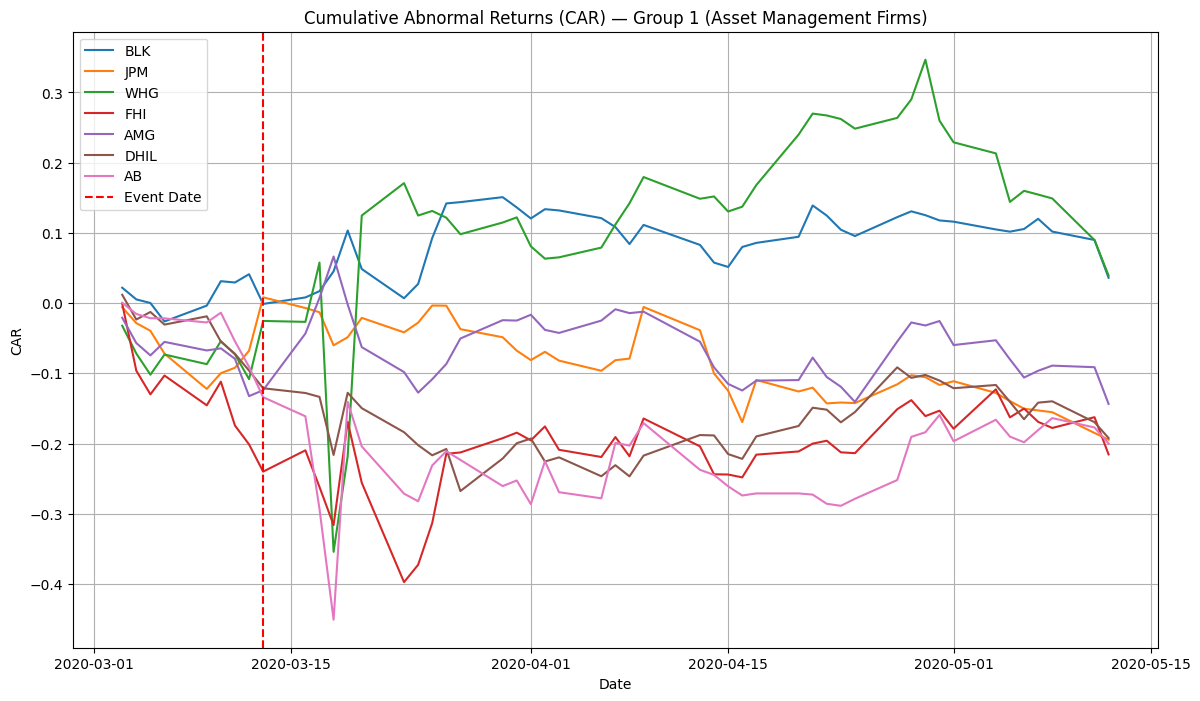

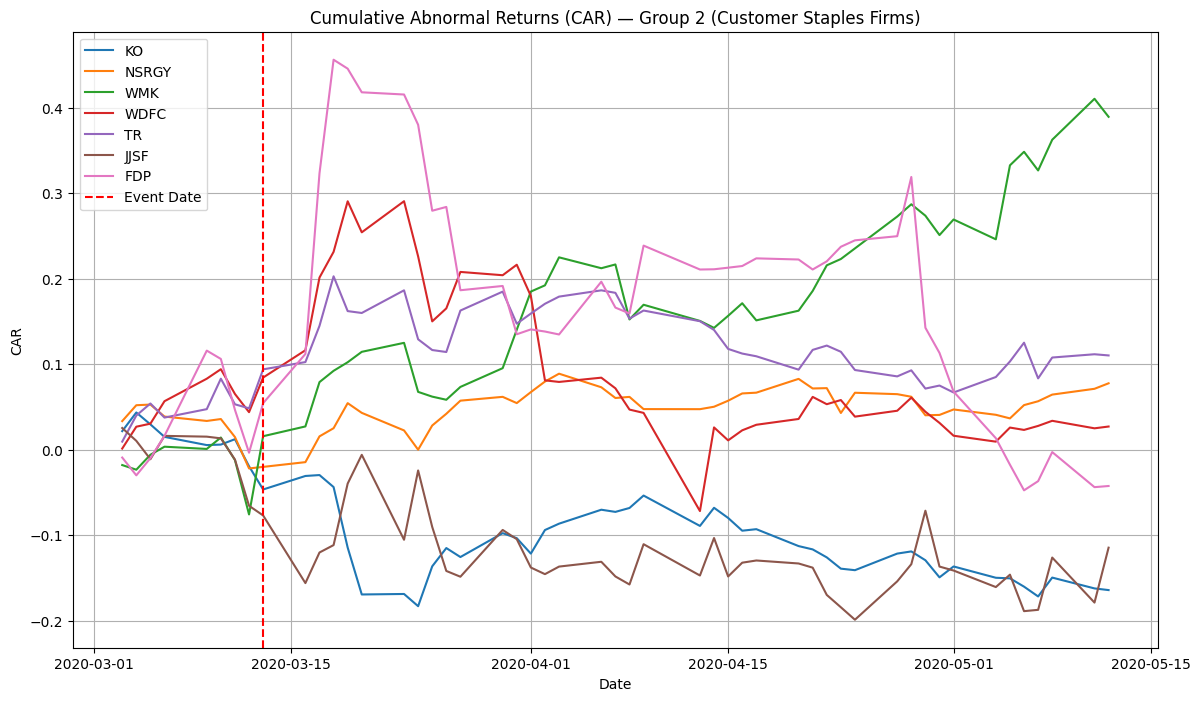

In [73]:
import matplotlib.pyplot as plt

# Split in two different plots (one for financial, one for non-financial)
tickers_group1 = ['BLK', 'JPM', 'WHG', 'FHI', 'AMG', 'DHIL', 'AB']
tickers_group2 = ['KO', 'NSRGY', 'WMK', 'WDFC', 'TR', 'JJSF', 'FDP']

# Plot for financial firms
plt.figure(figsize=(14,8))
for ticker in tickers_group1:
    plt.plot(CAR_df.index, CAR_df[ticker], label=ticker)

plt.axvline(event_date, color='red', linestyle='--', label='Event Date')
plt.title('Cumulative Abnormal Returns (CAR) — Group 1 (Asset Management Firms)')
plt.xlabel('Date')
plt.ylabel('CAR')
plt.legend()
plt.grid(True)
plt.show()

# Plot for non-financial firms
plt.figure(figsize=(14,8))
for ticker in tickers_group2:
    plt.plot(CAR_df.index, CAR_df[ticker], label=ticker)

plt.axvline(event_date, color='red', linestyle='--', label='Event Date')
plt.title('Cumulative Abnormal Returns (CAR) — Group 2 (Customer Staples Firms)')
plt.xlabel('Date')
plt.ylabel('CAR')
plt.legend()
plt.grid(True)
plt.show()

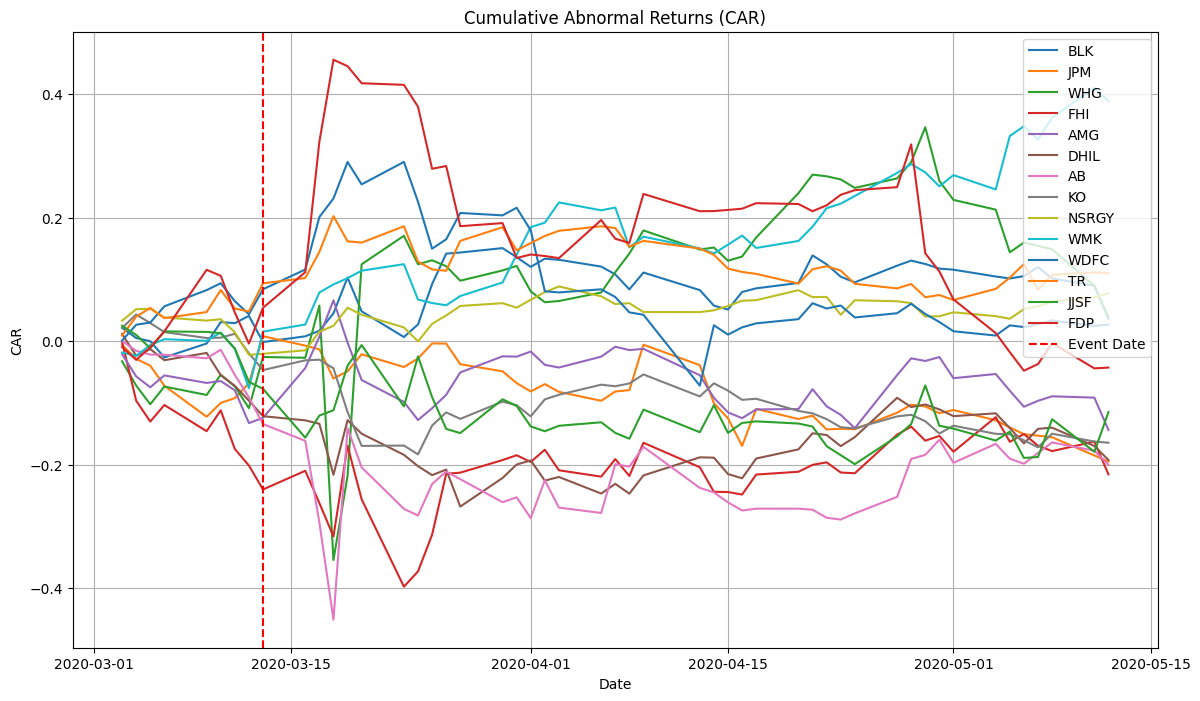

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
for ticker in tickers:
    plt.plot(CAR_df.index, CAR_df[ticker], label=ticker)

plt.axvline(event_date, color='red', linestyle='--', label='Event Date')
plt.title('Cumulative Abnormal Returns (CAR)')
plt.xlabel('Date')
plt.ylabel('CAR')
plt.legend()
plt.grid(True)
plt.show()


## FAMA FRENCH 5 Factor Model

In [75]:
fama = pd.read_csv("F-F_Research_Data_5_Factors_2x3_daily.CSV", skiprows=3)
fama

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19630701,-0.67,0.02,-0.35,0.03,0.13,0.012
1,19630702,0.79,-0.28,0.28,-0.08,-0.21,0.012
2,19630703,0.63,-0.18,-0.10,0.13,-0.25,0.012
3,19630705,0.40,0.09,-0.28,0.07,-0.30,0.012
4,19630708,-0.63,0.07,-0.20,-0.27,0.06,0.012
...,...,...,...,...,...,...,...
15476,20241224,1.11,-0.12,-0.05,-0.13,-0.37,0.017
15477,20241226,0.02,1.09,-0.19,-0.44,0.35,0.017
15478,20241227,-1.17,-0.44,0.56,0.41,0.03,0.017
15479,20241230,-1.09,0.24,0.74,0.55,0.14,0.017


In [76]:
fama.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)


In [77]:
fama['Date'] = fama['Date'].astype(str)
fama['Date'] = pd.to_datetime(fama['Date'], format='%Y%m%d')

# Convert factors and RF to decimals
for col in ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']:
    fama[col] = fama[col] / 100

# Check
print(fama['Date'].head())


0   1963-07-01
1   1963-07-02
2   1963-07-03
3   1963-07-05
4   1963-07-08
Name: Date, dtype: datetime64[ns]


### FAMA-FRENCH - COVID-19

In [78]:
data = yf.download(tickers, start="2020-01-01", end="2020-12-31", group_by='ticker', auto_adjust=True)

# Create a DataFrame with all tickers' adjusted close
price_data = pd.DataFrame({t: data[t]['Close'] for t in tickers})
price_data = price_data.reset_index()

# Calculate daily returns 
returns_df = price_data.copy()
for t in tickers:
    returns_df[t] = price_data[t].pct_change()
returns_df = returns_df.dropna()  
returns_df['Date'] = pd.to_datetime(returns_df['Date'])

# Merge returns with Fama-French data by Date
data_merged = pd.merge(returns_df, fama, on='Date', how='inner')

# Fama-French 5-Factor regression model
results = {}
for ticker in tickers:
    y = data_merged[ticker] - data_merged['RF']  # excess returns
    X = data_merged[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
    X = sm.add_constant(X)
    
    model = sm.OLS(y, X).fit()
    results[ticker] = {
        "alpha": model.params["const"],
        "beta_MKT": model.params["Mkt-RF"],
        "beta_SMB": model.params["SMB"],
        "beta_HML": model.params["HML"],
        "beta_RMW": model.params["RMW"],
        "beta_CMA": model.params["CMA"],
        "rsquared": model.rsquared
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df.index.name = "Ticker"
results_df = results_df.round(4)
print(results_df)





[*********************100%***********************]  14 of 14 completed


         alpha  beta_MKT  beta_SMB  beta_HML  beta_RMW  beta_CMA  rsquared
Ticker                                                                    
BLK     0.0010    1.1697   -0.1585    0.2347   -0.6706    0.0939    0.7269
JPM     0.0009    1.0290   -0.4442    1.4204   -0.6158   -0.5060    0.8999
WHG    -0.0019    1.0711    1.5305    0.7792   -0.1384   -1.4537    0.4880
FHI     0.0005    1.3078    0.1468    0.9283   -0.9411    0.4351    0.6726
AMG     0.0016    1.1673   -0.1570    0.7693   -0.1437    1.0138    0.7367
DHIL    0.0003    0.7175    0.7489    0.3453   -0.2533   -0.0098    0.5858
AB      0.0003    1.1918    0.9036    0.4193   -0.3939   -0.7974    0.6063
KO      0.0002    0.7571   -0.1944    0.2760   -0.0034    0.6900    0.6919
NSRGY  -0.0001    0.5594   -0.1480   -0.1144   -0.3753    0.2603    0.5553
WMK     0.0004    0.4855    0.2794   -0.2939   -0.0643    0.9108    0.1973
WDFC    0.0006    0.6133    0.5111   -0.5076    0.3542    0.8141    0.2390
TR     -0.0005    0.3672 

### FAMA-FRENCH model - 2008 Financial Crisis

In [79]:
data = yf.download(tickers, start="2008-01-01", end="2008-12-31", group_by='ticker', auto_adjust=True)

# Create a DataFrame with all tickers' adjusted close
price_data = pd.DataFrame({t: data[t]['Close'] for t in tickers})
price_data = price_data.reset_index() 

# Calculate daily returns 
returns_df = price_data.copy()
for t in tickers:
    returns_df[t] = price_data[t].pct_change()
returns_df = returns_df.dropna() 
returns_df['Date'] = pd.to_datetime(returns_df['Date'])

# Merge returns with Fama-French data by Date
data_merged = pd.merge(returns_df, fama, on='Date', how='inner')

# Fama-French 5-Factor regression model
results = {}
for ticker in tickers:
    y = data_merged[ticker] - data_merged['RF']  # excess returns
    X = data_merged[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
    X = sm.add_constant(X)
    
    model = sm.OLS(y, X).fit()
    results[ticker] = {
        "alpha": model.params["const"],
        "beta_MKT": model.params["Mkt-RF"],
        "beta_SMB": model.params["SMB"],
        "beta_HML": model.params["HML"],
        "beta_RMW": model.params["RMW"],
        "beta_CMA": model.params["CMA"],
        "rsquared": model.rsquared
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df.index.name = "Ticker"
results_df = results_df.round(4)
print(results_df)




[*********************100%***********************]  14 of 14 completed


         alpha  beta_MKT  beta_SMB  beta_HML  beta_RMW  beta_CMA  rsquared
Ticker                                                                    
BLK     0.0017    1.4546    0.7844   -0.0728   -0.7421    1.1884    0.6272
JPM     0.0010    1.0218    0.3306    2.2677    0.2622   -0.5120    0.7969
WHG     0.0017    1.1118    1.0922   -0.1751   -0.5314    0.0139    0.4794
FHI    -0.0013    1.0960    0.2754    0.7975    0.6442    0.2126    0.5156
AMG    -0.0000    1.2312    1.1894    0.9740   -0.8718   -1.7003    0.6968
DHIL    0.0025    1.0003    1.0596    0.3931    0.0315   -0.6810    0.4322
AB     -0.0017    1.3046    0.7824    0.6013   -0.6920    0.5224    0.6384
KO      0.0002    0.7285   -0.0912   -0.3074   -0.1132    1.1982    0.5213
NSRGY   0.0005    0.5078   -0.4606   -0.0422    0.0291    0.0486    0.4077
WMK     0.0002    0.7647    0.5650    0.1406    0.4903    0.6922    0.4914
WDFC   -0.0003    0.8995    1.0370    0.2857    0.8491    1.3499    0.5116
TR      0.0014    0.8447 